# Assignment 5
## Applied Machine Learning

Andrew Chan 
EBE869

This assignment assumes that `train.csv` and `test.csv` is in the same directory as this notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df_train = pd.read_csv('train.csv')

# Sanity check
print(f' TRAIN N rows={len(df_train)}, M columns={len(df_train.columns)}')
df_train.head()


 TRAIN N rows=891, M columns=12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Locate and load the data file
df_test = pd.read_csv('test.csv')

# Sanity check
print(f' TEST N rows={len(df_test)}, M columns={len(df_test.columns)}')
df_test.head()

 TEST N rows=418, M columns=11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Part (a.) [50 pts] Preprocess the data, impute missing values as you see fit, and remove features that you see useless.

## Remove unecessary features

* It does not make sense for `Name` to determine survival since they are unique ids, thus it is removed.  
* It does not make sense for `Ticket` to determine survival since it is almost a unique id, thus it is removed.  
* `Cabin` is mostly null, thus it is removed.

In [4]:
df_train = df_train.drop(['Name'], axis=1)
df_train = df_train.drop(['Ticket'], axis=1)
df_train = df_train.drop(['Cabin'], axis=1)

In [5]:
df_test = df_test.drop(['Name'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

## Imputation: Replace NaN with mean values
* Replace NaN with mean values

In [6]:
df_train = df_train.fillna(df_train.mean())

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_test = df_test.fillna(df_test.mean())

In [9]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Imputation: Replace NaN

* Use forward fill and backfill to fill NaN for ordinal values:

In [10]:
df_train = df_train.fillna(method='pad')
df_train = df_train.fillna(method='bfill')

## One hot encoding of training set
* One hot encode and drop_first ordinal features

In [11]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

In [12]:
df_train = pd.get_dummies(df_train, drop_first = True)

In [13]:
df_train_no_target = df_train.drop(['Survived'], axis=1)

In [14]:
df_train_no_target.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


## One hot encoding of test set
* One hot encode the same for test set; ensure that train and test set have the same number of features

In [15]:
df_test = pd.get_dummies(df_test,drop_first = True)

In [16]:
df_train_no_target,df_test = df_train_no_target.align(df_test, join='outer', axis=1, fill_value=0)

In [17]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [18]:
df_train_no_target.shape

(891, 9)

In [19]:
df_test.shape

(418, 9)

## Standardization
* Standardize numeric values

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_no_target[['Age', 'Fare']] = scaler.fit_transform(df_train_no_target[['Age', 'Fare']])

In [21]:
df_test[['Age', 'Fare']] = scaler.transform(df_test[['Age', 'Fare']])

## Drop PassengerId
Drop `PassenderId` since it is just a unique id that does not affect survival.

In [22]:
X_train = df_train_no_target.drop(['PassengerId'], axis=1).values

In [23]:
X_test = df_test.drop(['PassengerId'], axis=1).values

In [24]:
y_train = df_train['Survived'].values

## Upsample Minority Class 1

There are more people that survived (class `1`) than did not, so we need to balance the classes.

In [25]:
from sklearn.utils import resample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])
X_upsampled, y_upsampled = resample(
         X_train[y_train == 1],
         y_train[y_train == 1],
         replace=True,
         n_samples=X_train[y_train == 0].shape[0],
         random_state=0)
print('Number of class 1 examples after:',
       X_train.shape[0])

Number of class 1 examples before: 342
Number of class 1 examples after: 891


In [26]:
# combine upsample with class 0
X_train = np.vstack((X_train[y_train == 0], X_upsampled))
y_train = np.hstack((y_train[y_train == 0], y_upsampled))

# Part (b.) [50 pts] Submit your predictions to Kaggle for the test dataset and report your accuracy in your submission.
## Linear SVM

In [27]:
from sklearn.svm import LinearSVC
from sklearn import metrics
clf = LinearSVC(random_state=0,max_iter=3000)
clf.fit(X_train, y_train)

LinearSVC(max_iter=3000, random_state=0)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Survived', 'PassengerId'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([y, passengerId])
save_preds('predictions_chan_lsvm.csv', y_pred, df_test)

### Score on Kaggle: 0.75119

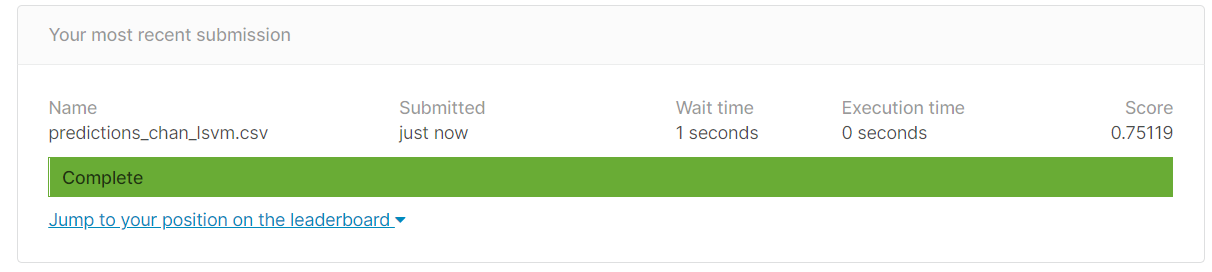

## RBF SVM

In [30]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel = 'rbf',random_state=0)
clf_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
y_pred_rbf = clf_rbf.predict(X_test)

In [32]:
save_preds('predictions_chan_rbf.csv', y_pred_rbf, df_test)

### Score on Kaggle: 0.75119

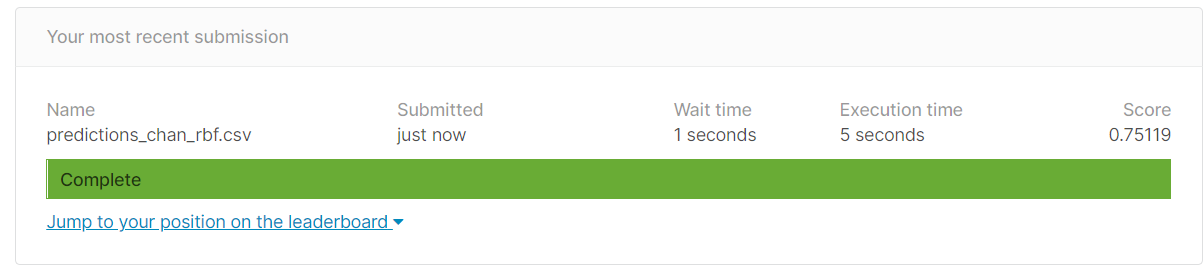

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0,n_estimators=100,n_jobs=-1)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
save_preds('predictions_chan_rf.csv', y_pred, df_test)

### Score on Kaggle: 0.74880

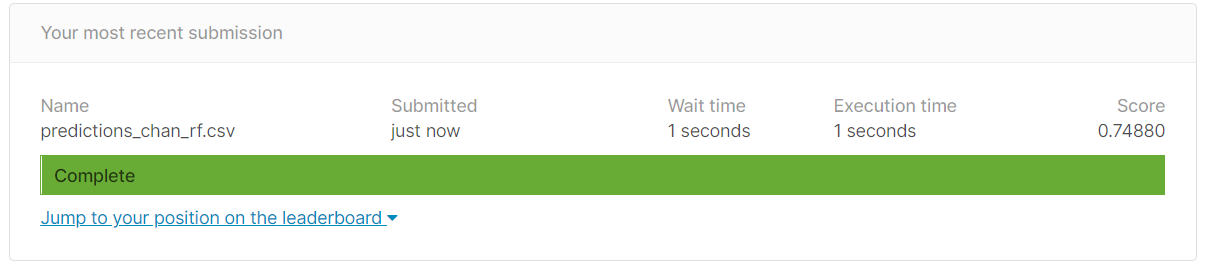